# Verifying For EDA
- 	Handle Missing Values: I will consider filling in missing values or using imputation techniques if necessary for my analysis.
- 	Verify Outliers: I will check the extreme values in the odds and statistics columns to ensure they are accurate and not due to data entry errors.
- 	Data Validation: Implement data validation rules to catch any inconsistencies or errors in future data entries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [44]:
historical_df = pd.read_csv("/Users/avkar/PycharmProjects/FinalYearProject/venv/Datasets/ufc-master.csv")
upcoming_df = pd.read_csv("/Users/avkar/PycharmProjects/FinalYearProject/venv/Datasets/upcoming.csv")

historical_df['source'] = 'historical'
upcoming_df['source'] = 'upcoming'

dataset = pd.concat([upcoming_df, historical_df], ignore_index=True)

## Check Column Formats

In [45]:
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 119 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    RedFighter                   object 
 1    BlueFighter                  object 
 2    RedOdds                      float64
 3    BlueOdds                     float64
 4    RedExpectedValue             float64
 5    BlueExpectedValue            float64
 6    Date                         object 
 7    Location                     object 
 8    Country                      object 
 9    Winner                       object 
 10   TitleBout                    bool   
 11   WeightClass                  object 
 12   Gender                       object 
 13   NumberOfRounds               int64  
 14   BlueCurrentLoseStreak        int64  
 15   BlueCurrentWinStreak         int64  
 16   BlueDraws                    int64  
 17   BlueAvgSigStrLanded          float64
 18   BlueAvgSigStrPct          

## Change Object types to String types

In [46]:
object_cols = dataset.select_dtypes(include=['object']).columns
dataset[object_cols] = dataset[object_cols].astype('string')

In [47]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 119 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    RedFighter                   string 
 1    BlueFighter                  string 
 2    RedOdds                      float64
 3    BlueOdds                     float64
 4    RedExpectedValue             float64
 5    BlueExpectedValue            float64
 6    Date                         string 
 7    Location                     string 
 8    Country                      string 
 9    Winner                       string 
 10   TitleBout                    bool   
 11   WeightClass                  string 
 12   Gender                       string 
 13   NumberOfRounds               int64  
 14   BlueCurrentLoseStreak        int64  
 15   BlueCurrentWinStreak         int64  
 16   BlueDraws                    int64  
 17   BlueAvgSigStrLanded          float64
 18   BlueAvgSigStrPct          

### Checking odds distribution

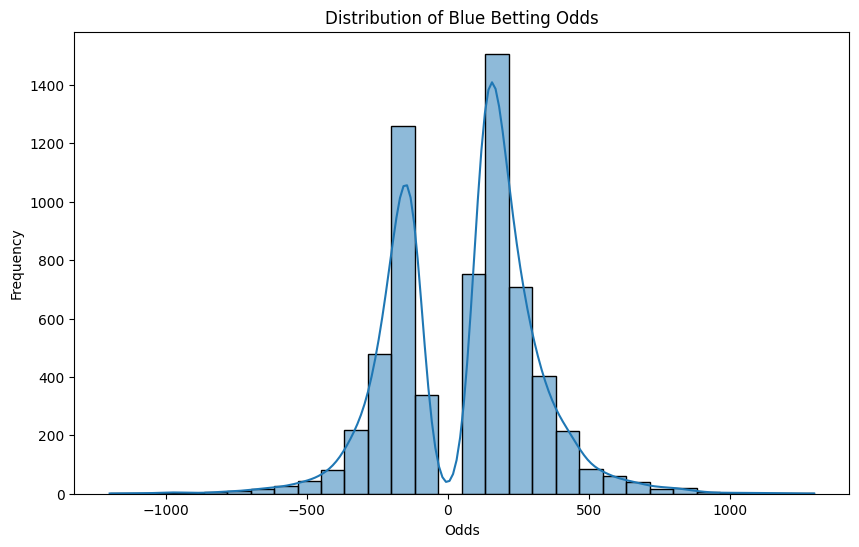

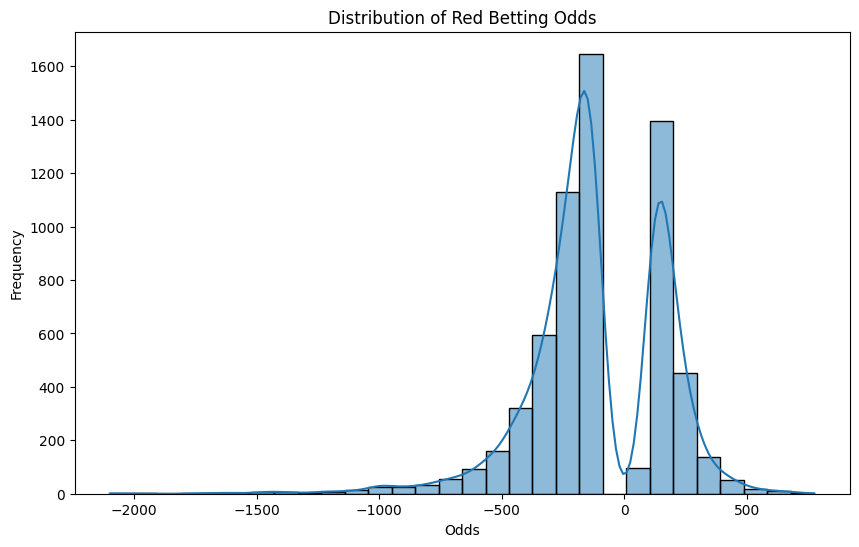

In [8]:
#Blue Odds
plt.figure(figsize=(10, 6))
sns.histplot(dataset['BlueOdds'].dropna(), bins=30, kde=True)
plt.title("Distribution of Blue Betting Odds")
plt.xlabel("Odds")
plt.ylabel("Frequency")
plt.show()

#Red Odds
plt.figure(figsize=(10, 6))
sns.histplot(dataset['RedOdds'].dropna(), bins=30, kde=True)
plt.title("Distribution of Red Betting Odds")
plt.xlabel("Odds")
plt.ylabel("Frequency")
plt.show()

In [9]:
blue_mean_odds = dataset['BlueOdds'].mean()
blue_median_odds = dataset['BlueOdds'].median()
blue_mode_odds = dataset['BlueOdds'].mode()[0]
blue_skewness = skew(dataset['BlueOdds'].dropna())

print(f"Mean: {blue_mean_odds}")
print(f"Median: {blue_median_odds}")
print(f"Mode: {blue_mode_odds}")
print(f"Skewness: {blue_skewness}")

Mean: 59.793240241193274
Median: 130.0
Mode: 130.0
Skewness: -0.10392450734223048


In [10]:
red_mean_odds = dataset['RedOdds'].mean()
red_median_odds = dataset['RedOdds'].median()
red_mode_odds = dataset['RedOdds'].mode()[0]
red_skewness = skew(dataset['RedOdds'].dropna())


print(f"Mean: {red_mean_odds}")
print(f"Median: {red_median_odds}")
print(f"Mode: {red_mode_odds}")
print(f"Skewness: {red_skewness}")

Mean: -115.71147436914775
Median: -150.0
Mode: -155.0
Skewness: -0.8305961362280802


In [48]:
#Impute using medians for each 
dataset['BlueOdds'].fillna(130.0, inplace=True)
dataset['RedOdds'].fillna(-150.0, inplace=True)

/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_65165/2626079535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BlueOdds'].fillna(130.0, inplace=True)
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_65165/2626079535.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Last UFC card (upcoming)
dataset.head(13)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,source
0,Colby Covington,Joaquin Buckley,205.0,-250.0,205.0000,40.0000,2024-12-14,"Tampa, Florida, USA",USA,<NA>,False,Welterweight,MALE,5,0,5,0,4.13,0.36,0.0,1.96,0.46,5,4,34,0,0,1,2,7,0,0,10,Southpaw,177.80,193.04,170,1,0,0,3.88,0.38,0.2,3.79,0.44,7,4,58,4,0,0,7,3,2,0,12,Orthodox,180.34,182.88,170,36,30,-1,5,-2,-2,0,-24,-4,4,-2,-2.54,10.16,-6,0.25,-0.2,-1.83,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Red,<NA>,<NA>,NaN,<NA>,NaN,300.0,175.0,1800.0,2000.0,1100.0,150.0,upcoming
1,Cub Swanson,Billy Quarantillo,124.0,-148.0,124.0000,67.5676,2024-12-14,"Tampa, Florida, USA",USA,<NA>,False,Featherweight,MALE,3,1,0,0,7.36,0.56,1.1,1.24,0.23,4,4,28,0,0,0,2,4,1,0,7,Orthodox,177.80,177.80,145,1,0,0,4.67,0.50,0.4,1.04,0.50,6,13,82,0,0,1,10,6,2,0,19,Orthodox,172.72,177.80,145,41,36,0,0,-2,-12,-9,-54,0,-2,-1,5.08,0.00,-5,2.69,0.7,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,<NA>,<NA>,NaN,<NA>,NaN,250.0,NaN,1800.0,NaN,450.0,NaN,upcoming
2,Manel Kape,Bruno Silva,-395.0,310.0,25.3165,310.0000,2024-12-14,"Tampa, Florida, USA",USA,<NA>,False,Flyweight,MALE,3,0,4,0,3.32,0.48,0.2,2.26,0.28,4,2,16,0,0,0,0,3,1,0,4,Orthodox,162.56,165.10,125,1,0,0,4.44,0.53,0.4,0.54,0.33,4,3,17,0,0,0,2,2,0,0,4,Southpaw,165.10,172.72,125,31,34,-1,4,0,0,-1,-1,0,1,1,-2.54,-7.62,3,-1.12,-0.2,1.72,NaN,12.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,Red,<NA>,<NA>,NaN,<NA>,NaN,-105.0,550.0,900.0,1800.0,225.0,1100.0,upcoming
3,Vitor Petrino,Dustin Jacoby,-340.0,270.0,29.4118,270.0000,2024-12-14,"Tampa, Florida, USA",USA,<NA>,False,Light Heavyweight,MALE,3,2,0,1,5.50,0.47,0.0,0.36,0.25,4,6,35,0,0,0,4,4,0,0,8,Orthodox,190.50,193.04,205,1,0,0,2.82,0.45,0.8,3.98,0.66,5,1,14,0,0,0,2,2,1,0,5,Orthodox,187.96,195.58,205,27,36,1,0,-1,3,5,21,0,2,-1,2.54,-2.54,9,2.68,-0.8,-3.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,<NA>,<NA>,NaN,<NA>,NaN,240.0,500.0,550.0,3000.0,110.0,800.0,upcoming
4,Adrian Yanez,Daniel Marcos,185.0,-225.0,185.0000,44.4444,2024-12-14,"Tampa, Florida

In [50]:
dataset['Finish'].unique()

<StringArray>
[<NA>, 'SUB', 'U-DEC', 'S-DEC', 'KO/TKO', 'M-DEC', 'DQ', 'Overturned']
Length: 8, dtype: string

In [51]:
dataset.isnull().sum(axis = 0)

RedFighter                        0
BlueFighter                       0
RedOdds                           0
BlueOdds                          0
RedExpectedValue                227
BlueExpectedValue               226
Date                              0
Location                          0
Country                           0
Winner                           13
TitleBout                         0
WeightClass                       0
Gender                            0
NumberOfRounds                    0
BlueCurrentLoseStreak             0
BlueCurrentWinStreak              0
BlueDraws                         0
BlueAvgSigStrLanded             930
BlueAvgSigStrPct                765
BlueAvgSubAtt                   832
BlueAvgTDLanded                 833
BlueAvgTDPct                    842
BlueLongestWinStreak              0
BlueLosses                        0
BlueTotalRoundsFought             0
BlueTotalTitleBouts               0
BlueWinsByDecisionMajority        0
BlueWinsByDecisionSplit     

## Examination insights:
- Many null values in fighter weight rankings
- Many null values in fighter avg stats, twice as much in blue than red
- 'FinishDetails' is NA when 'Finish' is a Decision
- Many null values in various betting odds stata


### Drop All odds columns apart from RedOdds and BlueOdds (not needed)

In [52]:
dataset = dataset.drop(columns=['RedExpectedValue','BlueExpectedValue','RedDecOdds','BlueDecOdds',
                      'RSubOdds','BSubOdds','RKOOdds','BKOOdds'])

### Convert date to datetime object

In [53]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

### Drop rows (excpet last UFC card) where there are null value in fighter stat avgs

In [54]:
print(dataset[['BlueAvgSigStrLanded','BlueAvgSigStrPct','BlueAvgSubAtt','BlueAvgTDLanded','BlueAvgTDPct']].isnull().sum())
print(dataset[['RedAvgSigStrLanded','RedAvgSigStrPct','RedAvgSubAtt','RedAvgTDLanded','RedAvgTDPct']].isnull().sum())

BlueAvgSigStrLanded    930
BlueAvgSigStrPct       765
BlueAvgSubAtt          832
BlueAvgTDLanded        833
BlueAvgTDPct           842
dtype: int64
RedAvgSigStrLanded    455
RedAvgSigStrPct       357
RedAvgSubAtt          357
RedAvgTDLanded        357
RedAvgTDPct           367
dtype: int64


In [55]:
fight_avg_cols = ['RedAvgSigStrLanded','RedAvgSigStrPct','RedAvgSubAtt','RedAvgTDLanded','RedAvgTDPct',
                  'BlueAvgSigStrLanded','BlueAvgSigStrPct','BlueAvgSubAtt','BlueAvgTDLanded','BlueAvgTDPct']

dataset = dataset.dropna(subset=fight_avg_cols)

In [56]:
dataset[['RedAvgSigStrLanded','RedAvgSigStrPct','RedAvgSubAtt','RedAvgTDLanded','RedAvgTDPct']].isnull().sum()

RedAvgSigStrLanded    0
RedAvgSigStrPct       0
RedAvgSubAtt          0
RedAvgTDLanded        0
RedAvgTDPct           0
dtype: int64

### Impute NaN ranks with -1

In [57]:
rank_columns = [col for col in dataset.columns if 'rank' in col.lower()]
dataset[rank_columns] = dataset[rank_columns].fillna(-1)

In [58]:
dataset.isnull().sum(axis=0)

RedFighter                        0
BlueFighter                       0
RedOdds                           0
BlueOdds                          0
Date                              0
Location                          0
Country                           0
Winner                           13
TitleBout                         0
WeightClass                       0
Gender                            0
NumberOfRounds                    0
BlueCurrentLoseStreak             0
BlueCurrentWinStreak              0
BlueDraws                         0
BlueAvgSigStrLanded               0
BlueAvgSigStrPct                  0
BlueAvgSubAtt                     0
BlueAvgTDLanded                   0
BlueAvgTDPct                      0
BlueLongestWinStreak              0
BlueLosses                        0
BlueTotalRoundsFought             0
BlueTotalTitleBouts               0
BlueWinsByDecisionMajority        0
BlueWinsByDecisionSplit           0
BlueWinsByDecisionUnanimous       0
BlueWinsByKO                

### Drop empty arena col

In [59]:
dataset = dataset.drop(columns=['EmptyArena'])

### Drop rows where 'Finish' is null

In [60]:
dataset = dataset[~((dataset['source'] == 'historical') & (dataset['Finish'].isnull()))]

### Impute 'No Finish' with null values in 'FinishDetails'

In [61]:
dataset['FinishDetails'] = dataset['FinishDetails'].fillna('No Finish')

### Drop rows with null values in FinishRound and FinishRoundTime and TotalFightTimeSecs

In [62]:
dataset = dataset[~((dataset['source'] == 'historical') &
                    (dataset[['FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']].isnull().any(axis=1)))]

In [63]:
dataset.isnull().sum(axis=0)

RedFighter                      0
BlueFighter                     0
RedOdds                         0
BlueOdds                        0
Date                            0
Location                        0
Country                         0
Winner                         13
TitleBout                       0
WeightClass                     0
Gender                          0
NumberOfRounds                  0
BlueCurrentLoseStreak           0
BlueCurrentWinStreak            0
BlueDraws                       0
BlueAvgSigStrLanded             0
BlueAvgSigStrPct                0
BlueAvgSubAtt                   0
BlueAvgTDLanded                 0
BlueAvgTDPct                    0
BlueLongestWinStreak            0
BlueLosses                      0
BlueTotalRoundsFought           0
BlueTotalTitleBouts             0
BlueWinsByDecisionMajority      0
BlueWinsByDecisionSplit         0
BlueWinsByDecisionUnanimous     0
BlueWinsByKO                    0
BlueWinsBySubmission            0
BlueWinsByTKOD

In [64]:
#Drop any remaining rows with null vals ('BlueStance')
dataset = dataset.dropna(subset=['BlueStance'])

In [65]:
dataset.isnull().sum(axis=0)

RedFighter                      0
BlueFighter                     0
RedOdds                         0
BlueOdds                        0
Date                            0
Location                        0
Country                         0
Winner                         13
TitleBout                       0
WeightClass                     0
Gender                          0
NumberOfRounds                  0
BlueCurrentLoseStreak           0
BlueCurrentWinStreak            0
BlueDraws                       0
BlueAvgSigStrLanded             0
BlueAvgSigStrPct                0
BlueAvgSubAtt                   0
BlueAvgTDLanded                 0
BlueAvgTDPct                    0
BlueLongestWinStreak            0
BlueLosses                      0
BlueTotalRoundsFought           0
BlueTotalTitleBouts             0
BlueWinsByDecisionMajority      0
BlueWinsByDecisionSplit         0
BlueWinsByDecisionUnanimous     0
BlueWinsByKO                    0
BlueWinsBySubmission            0
BlueWinsByTKOD

## Save cleaned data to file

In [66]:
dataset.to_csv("cleaned_eda_dataset.csv", index=False)

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs
13,Alexandre Pantoja,Kai Asakura,-250.0,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,11.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Red,SUB,Rear Naked Choke,2.0,2:05,425.0
14,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,7.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,Red,U-DEC,No Finish,5.0,5:00,1500.0
15,Ciryl Gane,Alexander Volkov,-380.0,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,3.0,2.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Red,S-DEC,No Finish,3.0,5:00,900.0
16,Bryce Mitchell,Kron Gracie,-950.0,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Red,KO/TKO,Elbows,3.0,0:39,639.0
17,Nate Landwehr,Dooho Choi,-130.0,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Featherweight,MALE,3,0,1,1,4.41,0.53,0.8,0.75,0.37,3,3,15,0,0,0,0,4,0,0,4,Orthodox,177.80,177.80,145,0,1,0,6.25,0.46,1.0,1.00,0.41,3,3,17,0,1,0,1,1,2,0,5,Orthodox,175.26,182.88,145,36,33,0,0,0,-1,0,-2,0,3,-2,2.54,-5.08,-3,-1.84,-0.2,